RIDGE REGRESSION USING GRADIENT DESCENT 

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes

In [2]:
x,y=load_diabetes(return_X_y=True)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [3]:
reg=Ridge(alpha=0.01,max_iter=500,solver='sparse_cg')
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [4]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5428695111568267

CODE FROM SCRATCH

In [5]:
class meraRidgeGD:
    def __init__(self,learning_rate,alpha,epochs):
        self.learning_rate=learning_rate
        self.alpha=alpha
        self.epochs=epochs
        self.coef_=None
        self.intercept_=None
    def fit(self,x_train,y_train):
        self.coef_=np.ones(x_train.shape[1])
        self.intercept_=0
        
        theta=np.insert(self.coef_,0,self.intercept_)
        x_train=np.insert(x_train,0,1,axis=1)
        for i in range(self.epochs):
            theta_der=np.dot(x_train.T,x_train).dot(theta)-np.dot(x_train.T,y_train)+self.alpha*theta
            theta=theta-self.learning_rate
        
        self.coef_=theta[1:]
        self.intercept_=theta[0]
    def predict(self,x_test):
        return np.dot(x_test,self.coef_)+self.intercept_


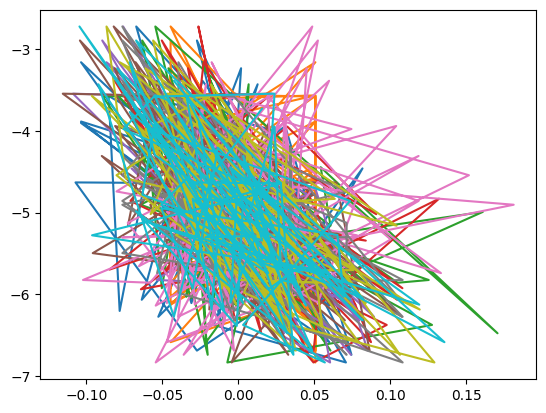

In [14]:
reg1=meraRidgeGD(learning_rate=0.01,alpha=0.01,epochs=500)
reg1.fit(x_train,y_train)
y_pred=reg1.predict(x_test)
import matplotlib.pyplot as plt 

plt.plot(x_test,y_pred)